## Assignment 1 -- Hybrid Images and Filters
                                                                                   Submitted to : Dr. Ramanthan
                                                                                   Submitted by : Aman Bilaiya (2018CSB1069)

In [11]:
"""
% Before trying to construct hybrid images, it is suggested that you
% implement my_imfilter.m and then debug it using proj1_test_filtering.m

% Debugging tip: You can split your MATLAB code into cells using "%%"
% comments. The cell containing the cursor has a light yellow background,
% and you can press Ctrl+Enter to run just the code in that cell. This is
% useful when projects get more complex and slow to rerun from scratch
"""

import matplotlib.pyplot as plt
import os
import cv2
from os.path import join
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from skimage.transform import rescale, resize, downscale_local_mean

from skimage import img_as_float
from scipy import signal

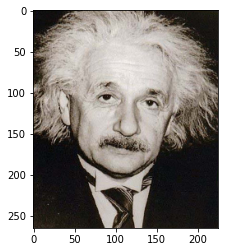

In [12]:
ROOT = os.getcwd()

# get path for input and output images
PATH_INPUT_IMAGES = join(ROOT, "data")
PATH_OUTPUT_IMAGES = join(ROOT, "Results")

img_path = join(''.join([PATH_INPUT_IMAGES, '/', 'einstein.bmp']))
image1 = mpimg.imread(img_path)
plt.imshow(image1)
plt.show()


In [13]:
def my_imfilter(image,Filter):
    
    # image & filter dimensions
    img_H = image.shape[0]
    img_W = image.shape[0]
    
    fil_H = Filter.shape[0]
    fil_W = Filter.shape[1]

    # Number of channels grey-1    rgb-3
    channels = len(image[0][0])
    
    output = np.zeros((image.shape[0], image.shape[1], channels))

    padded_img = np.zeros((image.shape[0] + Filter.shape[0]-1, image.shape[1] + Filter.shape[1]-1, channels))

    # adjusting image to the in the padded_img
    padded_img[int((Filter.shape[0]-1)/2) : image.shape[0]+int((Filter.shape[0]-1)/2), int((Filter.shape[1]-1)/2) : image.shape[1] + int((Filter.shape[1]-1)/2)] = image

    for k in range(channels):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                output[i][j][k] = np.sum(np.multiply(padded_img[i:i+Filter.shape[0], j:j+Filter.shape[1], k], Filter))
    
    output = np.clip(output, 0, 1) 
    return output

In [14]:
def  vis_hybrid_image(hybrid_image):

  """
  %visualize a hybrid image by progressively downsampling the image and
  %concatenating all of the images together.
  """
  scales = 5#how many downsampled versions to create
  padding = 5 #how many pixels to pad.

  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] #counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2,scales+1):
      # add padding
      # output = cat(2, output, np.ones(original_height, padding, num_colors)) #implement the correct command here
      output = np.concatenate((output, np.ones((original_height, padding, num_colors))),axis = 1)
      # dowsample image
      cur_image = resize(cur_image,(cur_image.shape[0] // 2, cur_image.shape[1] // 2), anti_aliasing=True)
      # pad the top and append to the output
      # tmp = cat(1,np.ones(original_height - cur_image.shape[0], cur_image.shape[1], num_colors), cur_image)
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image), axis = 0)
      # output = cat(2, output, tmp);    
      output = np.concatenate((output, tmp), axis=1);
  
  return(output)

""" adopted from code by James Hays (GATech)"""

' adopted from code by James Hays (GATech)'

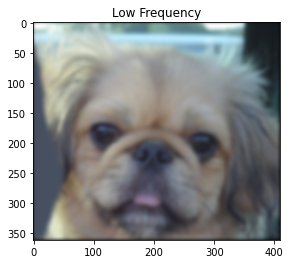

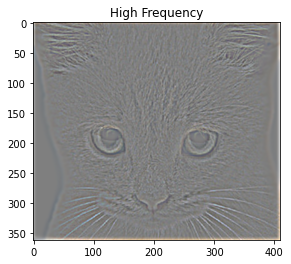

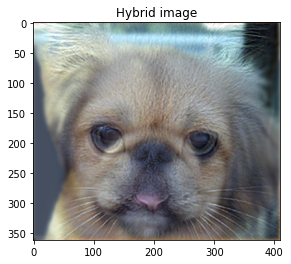

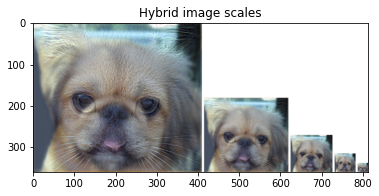

In [15]:
######################################### HYBRID IMAGE TESTING ############################################################

#%% close all figures
plt.close('all') # closes all figures

# bicycle motorcycle
# cat dog
# einstein marilyn
# bird plane
# fish submarine

dog_img_path = join(''.join([PATH_INPUT_IMAGES, '/', 'dog.bmp']))
cat_img_path = join(''.join([PATH_INPUT_IMAGES, '/', 'cat.bmp']))

#%% Setup
#% read images and convert to floating point format
image1 = mpimg.imread(dog_img_path)
image2 = mpimg.imread(cat_img_path)

image1 = img_as_float(image1) #will provide the low frequencies
image2 = img_as_float(image2) #will provide the high frequencies


"""
% Several additional test cases are provided for you, but feel free to make
% your own (you'll need to align the images in a photo editor such as
% Photoshop). The hybrid images will differ depending on which image you
% assign as image1 (which will provide the low frequencies) and which image
% you asign as image2 (which will provide the high frequencies)
"""

""" %% Filtering and Hybrid Image construction """
cutoff_frequency = 3

"""This is the standard deviation, in pixels, of the 
% Gaussian blur that will remove the high frequencies from one image and 
% remove the low frequencies from another image (by subtracting a blurred
% version from the original version). You will want to tune this for every
% image pair to get the best results. """

#filter=[] insert values from fspecial('Gaussian', cutoff_frequency*4+1, cutoff_frequency) here
filter = np.reshape(np.asarray(signal.get_window(('gaussian', cutoff_frequency), cutoff_frequency*4 + 1)), (cutoff_frequency*4 + 1, 1)) ;
filter = filter/np.sum(filter)
filter_transpose = np.transpose(filter)

"""
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% YOUR CODE BELOW. Use my_imfilter to create 'low_frequencies' and
% 'high_frequencies' and then combine them to create 'hybrid_image'
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Remove the high frequencies from image1 by blurring it. The amount of
% blur that works best will vary with different image pairs
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
"""

#low_frequencies = 
low_frequencies = my_imfilter(image1, filter)
low_frequencies = my_imfilter(low_frequencies, filter_transpose)

"""
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Remove the low frequencies from image2. The easiest way to do this is to
% subtract a blurred version of image2 from the original version of image2.
% This will give you an image centered at zero with negative values.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
"""

#high_frequencies = 
low_frequencies_2 = my_imfilter(image2, filter)
low_frequencies_2 = my_imfilter(low_frequencies_2, filter_transpose)
high_frequencies = image2 - low_frequencies_2

"""
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Combine the high frequencies and low frequencies
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
#hybrid_image = 
hybrid_image = low_frequencies + high_frequencies

#%% Visualize and save outputs


imgLr = np.clip(low_frequencies,0,1)
imgRr = np.clip(high_frequencies + 0.5,0,1)



# f = plt.figure()
# f.add_subplot(1,2, 1)
# plt.title("Low Frequency")
# plt.imshow(imgLr)
# f.add_subplot(1,2, 2)
# plt.title("High Frequency")
# plt.imshow(imgRr)
# plt.show(block=True)


plt.figure(1)
plt.title("Low Frequency")
plt.imshow(np.clip(low_frequencies,0,1))
plt.show()


plt.figure(2)
plt.title("High Frequency")
plt.imshow(np.clip(high_frequencies + 0.5,0,1));
plt.show()


plt.figure(3)
plt.title("Hybrid image")
plt.imshow(np.clip(hybrid_image,0,1))
plt.show()

vis = vis_hybrid_image(hybrid_image) #see function script vis_hybrid_image.py
plt.figure(4)
plt.title("Hybrid image scales")
plt.imshow(np.clip(vis,0,1))
plt.show()



# outputPath = join(''.join([PATH_OUTPUT_IMAGES, '/']))
# mpimg.imsave('Results/low_frequencies.jpg',np.clip(low_frequencies, 0, 1.0)) 
# mpimg.imsave('Results/high_frequencies.jpg',np.clip(high_frequencies + 0.5, 0, 1.0)) 
# mpimg.imsave('Results/hybrid_image.jpg',np.clip(hybrid_image, 0, 1.0))
# mpimg.imsave('Results/hybrid_image_scales.jpg',np.clip(vis, 0, 1.0))


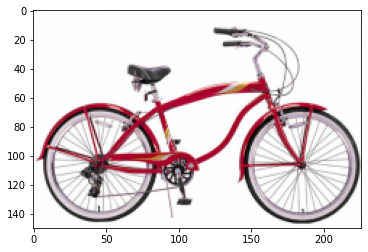

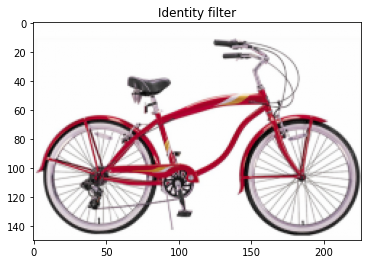

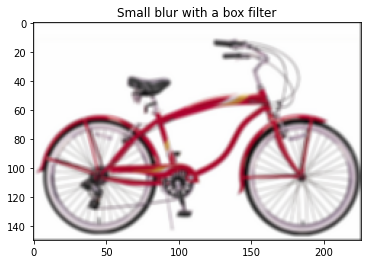

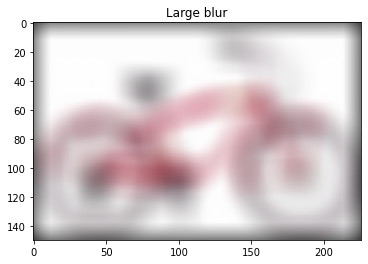

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


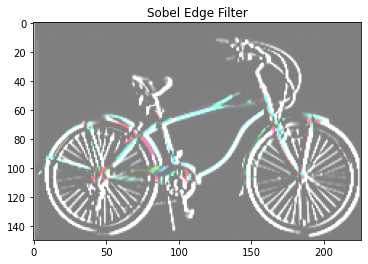

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


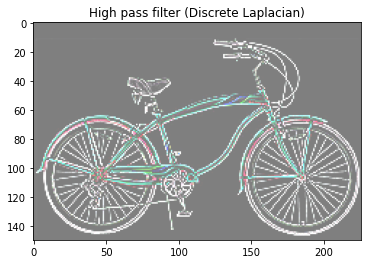

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


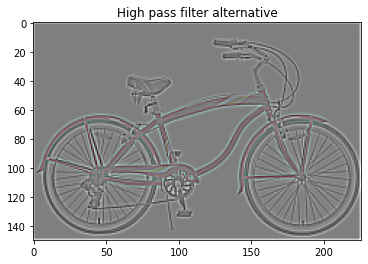

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


' adopted from code by James Hays (GATech)'

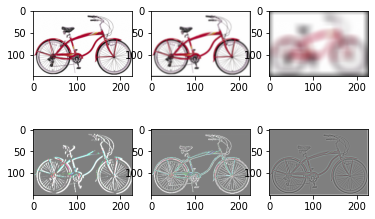

In [17]:
################################### FILTER TESTING #######################################

#%% close all figures
plt.close('all')

# bicycle motorcycle
# cat dog
# einstein marilyn
# bird plane
# fish submarine


img_path = join(''.join([PATH_INPUT_IMAGES, '/', 'bicycle.bmp']))

#%% Setup
test_image = mpimg.imread(img_path);
test_image = resize(test_image, (test_image.shape[0] // 2, test_image.shape[1] // 2), anti_aliasing=True)#resizing to speed up testing
plt.figure(1)
plt.imshow(test_image)
plt.show()

#%% This filter should do nothing regardless of the padding method you use.
""" Identity filter """

identity_filter = np.asarray([[0,0,0],[0,1,0],[0,0,0]]);
identity_image  = my_imfilter(test_image, identity_filter)

plt.figure(2)
plt.title("Identity filter")
plt.imshow(identity_image)
plt.show()
# mpimg.imsave('Results/identity_image.jpg',identity_image);
#

#%% This filter should remove some high frequencies
""" Small blur with a box filter """

blur_filter = np.asarray([[1,1,1],[1,1,1],[1,1,1]],dtype='float32');
blur_filter = blur_filter / np.sum(blur_filter); # making the filter sum to 1
#
blur_image = my_imfilter(test_image, blur_filter);
#
plt.figure(3) 
plt.title("Small blur with a box filter")
plt.imshow(blur_image);
plt.show()
# mpimg.imsave('Results/blur_image.jpg',blur_image);
#

#%% Large blur
""" This blur would be slow to do directly, so we instead use the fact that
     Gaussian blurs are separable and blur sequentially in each direction. """

large_1d_blur_filter = np.reshape(np.asarray(signal.get_window(('gaussian', 10.0), 25)), (25, 1))# import values from fspecial('Gaussian', [25 1], 10) here
large_1d_blur_filter = large_1d_blur_filter/np.sum(large_1d_blur_filter)
large_1d_blur_filter_transpose = np.transpose(large_1d_blur_filter)
large_blur_image = my_imfilter(test_image, large_1d_blur_filter)
large_blur_image = my_imfilter(large_blur_image,
                               large_1d_blur_filter_transpose) #implement large_1d_blur_filter_transpose
#
plt.figure(4) 
plt.title("Large blur")
plt.imshow(large_blur_image);
plt.show()
# mpimg.imsave('Results/large_blur_image.jpg', large_blur_image);
#
#% %If you want to see how slow this would be to do naively, try out this
#% %equivalent operation:
#% tic %tic and toc run a timer and then print the elapsted time
#% large_blur_filter = fspecial('Gaussian', [25 25], 10);
#% large_blur_image = my_imfilter(test_image, large_blur_filter);
#% toc 
#
#%% Oriented filter (Sobel Operator)
""" Edge Filter """
sobel_filter = np.asarray([[-1,0,1],[-2,0,2],[-1,0,1]]) #should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter);
#
# 0.5 added because the output image is centered around zero otherwise and mostly black
plt.figure(5)
plt.title("Sobel Edge Filter")
plt.imshow(sobel_image + 0.5)
plt.show()
# mpimg.imsave('Results/sobel_image.jpg',np.clip(sobel_image + 0.5, 0, 1.0))
#
#
#%% High pass filter (Discrete Laplacian)
""" Laplacian Filter """
laplacian_filter = np.asarray([[0,1,0],[1,-4,1],[0,1,0]])
laplacian_image = my_imfilter(test_image, laplacian_filter)
# 0.5 added because the output image is centered around zero otherwise and mostly black
plt.figure(6)
plt.title("High pass filter (Discrete Laplacian)")
plt.imshow(laplacian_image + 0.5)
plt.show()
# mpimg.imsave('Results/laplacian_image.jpg', np.clip(laplacian_image + 0.5, 0, 1.0))
#
#%% High pass "filter" alternative
""" High pass filter example we saw in class """
high_pass_image = test_image - blur_image #simply subtract the low frequency content
plt.figure(7)
plt.title("High pass filter alternative")
plt.imshow(high_pass_image + 0.5)
plt.show()
# mpimg.imsave('Results/high_pass_image.jpg', np.clip(high_pass_image + 0.5, 0, 1.0))


f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(identity_image)
axarr[0,1].imshow(blur_image)
axarr[0,2].imshow(large_blur_image)
axarr[1,0].imshow(sobel_image + 0.5)
axarr[1,1].imshow(laplacian_image + 0.5)
axarr[1,2].imshow(high_pass_image + 0.5)


""" adopted from code by James Hays (GATech)"""